# CHEM361 - Homework0

This notebook demonstrates **how Python operates** with simple examples of **processing chemical molecule data** and applying **supervised learning (linear regression)** techniques. For future project homework releases, each homework will include a notebook with relevant examples for guidance. Please follow this tutorial step by step, ensuring you understand each part thoroughly.

## 1. Install Dependencies

This tutorial will require you to install the following Python packages: _pandas_ [1], _matplotlib_ [2], _scikit-learn_ [3], _rdkit_ [4]

🖍 [1] **pandas** package - [Website](https://pandas.pydata.org/docs/)

🖍 [2] **matplotlib** package - [Website](https://matplotlib.org/stable/index.html)

🖍 [3] **scikit-learn** package - [Website](https://scikit-learn.org/dev/index.html)

🖍 [4] **rdkit** package - [Website](https://www.rdkit.org/docs/)

You can install these packages either by running the command **pip install <pkg_name>** in your terminal or by executing the following cell in Jupyter Notebook (if you are using Google Colab).

In [ ]:
!pip install pandas matplotlib rdkit scikit-learn wget

## 2. Download Dataset

wget is a command-line tool used to download files from the internet. The **!** at the beginning is specific to Jupyter Notebook or IPython environments. It allows you to run shell commands directly from a notebook cell. This will download and save the **delaney-processed.csv** file in the current working directory.

In [2]:
!python -m wget https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv

100% [..........................................................] 96699 / 96699
Saved under delaney-processed.csv


## 3. Load Dataset

After downloading the chemical compound dataset containing information on compound IDs, solubility, etc, we use _Pandas_ [1] to load the data into a readable format in Python. _Pandas_ is a powerful Python library designed for data manipulation and analysis, providing intuitive and efficient methods to load data into DataFrames for further processing and analysis.

Here’s how Pandas excels in loading data, particularly with CSV files, the most widely used format for structured data:

In [3]:
import pandas as pd

DELANEY_FILE = "delaney-processed.csv"
df = pd.read_csv(DELANEY_FILE)
print(f"Number of molecules in the dataset: {df.shape[0]}")

Number of molecules in the dataset: 1128


We can print the top five rows in it.

In [4]:
# df.head(5) means print the top five rows of the DataFrame.
df.head(5)

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


## 4. Generate Molecule

We next use _rdkit_ [4] to generate the molecules using their smile strings within the dataset. _rdkit_ is a powerful open-source toolkit for cheminformatics, widely used for processing and analyzing chemical compound information. When working with chemical data stored in a Pandas DataFrame, _rdkit_ provides seamless integration to manipulate molecular structures, calculate chemical descriptors, and perform tasks like molecular similarity calculations, fingerprint generation, or substructure searches. Using _rdkit_, you can convert chemical representations, such as SMILES (Simplified Molecular Input Line Entry System) strings or InChI (International Chemical Identifier), into _rdkit_ molecule objects, which can then be used to extract valuable insights or visualize chemical structures directly within your DataFrame. 

We can create molecule objects in _rdkit_ based on their smile strings using the following code:

In [5]:
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(df, "smiles", "mol")
df.head(5)

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,mol
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,<rdkit.Chem.rdchem.Mol object at 0x7efdf4f9b0b0>
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x7efdf4f9b2e0>
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),<rdkit.Chem.rdchem.Mol object at 0x7efdf4f9b270>
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,<rdkit.Chem.rdchem.Mol object at 0x7efdf4f9b350>
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,<rdkit.Chem.rdchem.Mol object at 0x7efdf3717510>


Visualize the molecular structure of **Amigdalin** (stored in the first row and last column within the DataFrame)

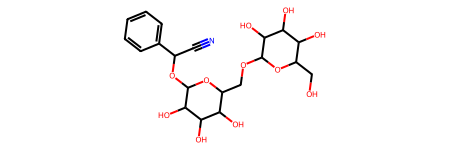

In [6]:
# df.iloc[0, -1] retrieves the value located at the intersection of the first row and the last column of the DataFrame.
df.iloc[0,-1]

## 5. Obtain Chemical Properties

We can extract the chemical properties from the DataFrame.

In [7]:
molecular_weight = df.iloc[:]["Molecular Weight"].values
log_solubility = df.iloc[:]["ESOL predicted log solubility in mols per litre"].values

We use _matplotlib_ [2] to visualize the data. If you’re unfamiliar with Matplotlib, we recommend consulting the official documentation or watching a YouTube tutorial for a quick introduction.

Text(0, 0.5, 'log solubility (mol/L)')

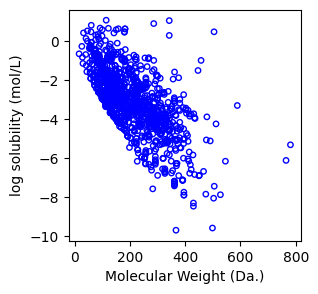

In [8]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(1,1,figsize=(3,3))
ax.scatter(molecular_weight,log_solubility,s=15, marker='o', facecolors='none', edgecolor="blue")
ax.set_xlabel("Molecular Weight (Da.)")
ax.set_ylabel("log solubility (mol/L)")

## 6. Linear Regression

Next, we demonstrate how to fit a **linear regression** model to predict a molecule's logarithmic solubility based on its molecular weight. 

**Linear regression** is a simple statistical method used to model the relationship between two variables by fitting a straight line to the data. It predicts a dependent variable (output) based on an independent variable (input). The goal is to find the line that minimizes the difference (residue sum of squares) between the predicted and actual values. In mathematical form, we denfine

- Linear weights $: w$, a column vector $w = (w^1, ..., w^p) \in \mathbb{R}^p$
- Data point $: x$, a column vector $x = (x^1, ..., x^p) \in \mathbb{R}^p$
- Target $: y$, a scalar $y \in \mathbb{R}^1$

Then, suppose we have $N$ data points, the objective function (to minimize) of **Linear regression** is

$$
\mathcal{L}(w) = \frac{1}{N}\sum_{i=1}^{N} \lVert w^Tx_i - y_i \rVert^2 
$$

We use _scikit-learn_ [3] to perform linear regression. 

First, we create a linear regression object and fit the data.

In [9]:
from sklearn.linear_model import LinearRegression

X = molecular_weight.reshape(-1,1)
y = log_solubility

regressor = LinearRegression().fit(X, y)

Then, we can predict the data using the **predict** function from the fitted model (_regressor_) and estimate the prediction error.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X)

print(f"Mean squared error: {mean_squared_error(y, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y, y_pred):.2f}")

Mean squared error: 1.52
Coefficient of determination: 0.46


Finally, we can plot the results.

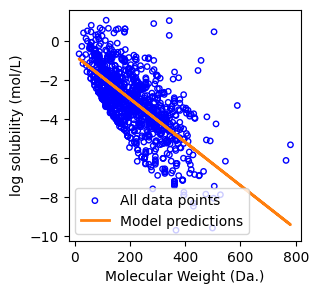

In [11]:
f, ax = plt.subplots(1,1,figsize=(3,3))

ax.scatter(molecular_weight,log_solubility,s=15, marker='o', facecolors='none', edgecolor="blue", label="All data points")
ax.plot(
    X,
    regressor.predict(X),
    linewidth=2,
    color="tab:orange",
    label="Model predictions",
)
ax.set_xlabel("Molecular Weight (Da.)")
ax.set_ylabel("log solubility (mol/L)")
ax.legend()

## 7. Linear Regression with Model Validation

A fundamental goal in machine learning is to build models that **generalize well to unseen data**. One of the most straightforward techniques to assess a model’s performance and avoid overfitting is the **train-test split**.

(1)  Basic Idea

You divide your dataset into two subsets:
- A training set used to fit (or “train”) the model.
- A test set kept separate and used only for final evaluation.

By evaluating the model on the test set—data that was never used during training—you can gauge how well the model generalizes to new, unseen data.

(2)  Why It Matters

- Training a model on the entire dataset can lead to overfitting, where the model memorizes the training data rather than learning general patterns.
- A test set serves as an unbiased check. If the model performs poorly on the test set, it indicates it may have overfitted the training data.

(3)  Typical Split Ratios
- Common splits include 70:30, 80:20, or 90:10 (train:test), depending on the dataset’s size and complexity.
- The key is to reserve a sufficient portion of the data for testing to get a reliable performance estimate.

We can implement train-test split using _scikit-learn_

In [12]:
from sklearn.model_selection import train_test_split

test_size = int(len(X)*0.1) # do 90:10 train:test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

Repeat the same steps as before, but now train the model on the training set and evaluate its performance on the test set.

In [14]:
regressor = LinearRegression().fit(X_train, y_train)

y_pred = regressor.predict(X_train)

print(f"Mean squared error on training set: {mean_squared_error(y_train, y_pred):.2f}")
print(f"Coefficient of determination on training set: {r2_score(y_train, y_pred):.2f}")

y_pred = regressor.predict(X_test)

print(f"Mean squared error on test set: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination on test set: {r2_score(y_test, y_pred):.2f}")

# You’ll notice that the error on test set is larger, which is expected since you’re evaluating the model on unseen data.

Mean squared error on training set: 1.51
Coefficient of determination on training set: 0.48
Mean squared error on test set: 1.63
Coefficient of determination on test set: 0.32


Text(0.5, 1.0, 'Test set')

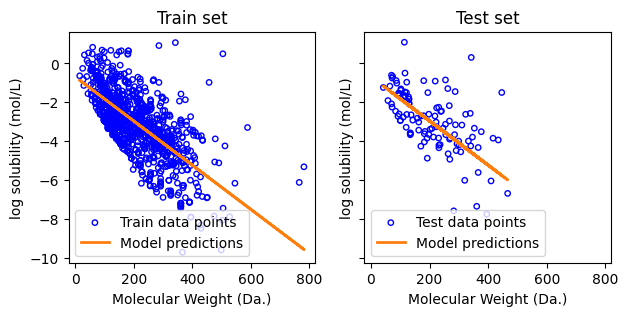

In [15]:
f, ax = plt.subplots(1,2,figsize=(7,3), sharex=True, sharey=True)

ax[0].scatter(X_train,y_train,s=15, marker='o', facecolors='none', edgecolor="blue", label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=2,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set_xlabel("Molecular Weight (Da.)")
ax[0].set_ylabel("log solubility (mol/L)")
ax[0].legend()
ax[0].set_title('Train set')

ax[1].scatter(X_test,y_test,s=15, marker='o', facecolors='none', edgecolor="blue", label="Test data points")
ax[1].plot(
    X_test,
    regressor.predict(X_test),
    linewidth=2,
    color="tab:orange",
    label="Model predictions",
)
ax[1].set_xlabel("Molecular Weight (Da.)")
ax[1].set_ylabel("log solubility (mol/L)")
ax[1].legend()
ax[1].set_title('Test set')